In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import anndata as ad
from Python_tools.ticci import ticci as ti
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Read Data

In [2]:
exprs_df = pd.read_csv('./output/AT2/AT2_norm_exprs.csv',index_col = 0)
exprs_df

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610010B08Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,...,Znhit3,Znrd1,Znrf1,Znrf3,Zranb2,Zrsr2,Zw10,Zwint,Zzef1,Zzz3
GSM1271862_E18_1_C08_IL3230,0.000000,0.000493,0.000000,1.909705,0.000000,0.951767,3.369576e-31,0.031327,0.791500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.227121,0.006203,0.133177,0.000000,0.000284,0.000000
GSM1271864_E18_1_C11_IL3230,0.000000,0.018741,0.173342,0.082772,0.130389,0.000000,0.000000e+00,0.000000,0.000000,1.152735,...,0.000000,0.000000,0.000000,0.556637,0.000000,0.000000,0.000000,0.000000,0.000000,0.309494
GSM1271865_E18_1_C13_IL3230,0.070999,0.000976,0.086725,0.000000,0.946381,0.000000,9.809689e-03,0.000000,0.435335,0.504429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM1271872_E18_1_C44_IL3230,0.000000,0.013378,0.155687,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.397933,0.000000,...,0.000000,0.000000,0.000000,0.001798,0.003169,0.000000,0.000000,0.036059,0.011306,0.000000
GSM1271873_E18_1_C45_IL3230,2.313677,0.001778,0.212688,1.171230,0.000000,0.000000,0.000000e+00,0.000000,2.291313,2.305758,...,0.000000,0.000000,0.003362,0.000000,0.209304,0.000000,0.000000,0.295625,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1272050_E16_1_C66_IL4148,0.000000,0.000000,0.000000,0.000000,0.571487,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.782133,0.000000,0.104236,0.068866,0.000000,0.000000,0.348761,0.000000,0.000000
GSM1272051_E16_1_C67_IL4148,0.000000,0.000000,1.037627,0.576275,0.000000,0.052707,0.000000e+00,0.000000,0.673834,0.044229,...,0.051736,0.000000,0.000000,0.330468,0.000000,0.050027,0.000000,0.000000,0.000000,0.000000
GSM1272053_E16_1_C72_IL4148,0.000000,0.000000,0.000000,1.212204,0.000000,0.191955,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.120482,0.557357,0.000000,1.652812,0.000000,0.000000,0.024970
GSM1272059_E16_1_C90_IL4148,0.000000,0.000000,0.000000,0.399969,0.000000,0.266706,0.000000e+00,0.000000,0.000000,0.410430,...,0.000000,0.000000,0.000000,0.102077,0.222680,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
meta_df = pd.read_csv('./output/AT2/AT2_meta.csv',index_col = 0)
meta_df

,Classification,state,entropy
GSM1271862_E18_1_C08_IL3230,1,E18,2.476037
GSM1271864_E18_1_C11_IL3230,1,E18,2.509392
GSM1271865_E18_1_C13_IL3230,1,E18,2.439551
GSM1271872_E18_1_C44_IL3230,2,E18,2.359357
GSM1271873_E18_1_C45_IL3230,1,E18,2.451126
...,...,...,...
GSM1272050_E16_1_C66_IL4148,3,E16,2.526388
GSM1272051_E16_1_C67_IL4148,3,E16,2.498311
GSM1272053_E16_1_C72_IL4148,3,E16,2.504573
GSM1272059_E16_1_C90_IL4148,3,E16,2.529069


In [4]:
adata = ad.AnnData(exprs_df)
adata

D:\ProgramData\anaconda3\envs\cci\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


AnnData object with n_obs × n_vars = 101 × 4734

In [5]:
adata.obs['state'] = meta_df['state']
adata.obs['entropy'] = meta_df['entropy']
adata

AnnData object with n_obs × n_vars = 101 × 4734
    obs: 'state', 'entropy'

In [6]:
# Save Data
# adata.write('./output/AT2/AT2.h5ad')

# Dimensionality Reduction and Neiborhood Graph

In [7]:
adata = sc.read('./output/AT2/AT2.h5ad')
adata

AnnData object with n_obs × n_vars = 101 × 4734
    obs: 'state', 'entropy'

In [8]:
adata.to_df()

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610010B08Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,...,Znhit3,Znrd1,Znrf1,Znrf3,Zranb2,Zrsr2,Zw10,Zwint,Zzef1,Zzz3
GSM1271862_E18_1_C08_IL3230,0.000000,0.000493,0.000000,1.909705,0.000000,0.951767,3.369576e-31,0.031327,0.791500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.227121,0.006203,0.133177,0.000000,0.000284,0.000000
GSM1271864_E18_1_C11_IL3230,0.000000,0.018741,0.173342,0.082772,0.130389,0.000000,0.000000e+00,0.000000,0.000000,1.152735,...,0.000000,0.000000,0.000000,0.556637,0.000000,0.000000,0.000000,0.000000,0.000000,0.309494
GSM1271865_E18_1_C13_IL3230,0.070999,0.000976,0.086725,0.000000,0.946381,0.000000,9.809690e-03,0.000000,0.435335,0.504429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GSM1271872_E18_1_C44_IL3230,0.000000,0.013378,0.155687,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.397933,0.000000,...,0.000000,0.000000,0.000000,0.001798,0.003169,0.000000,0.000000,0.036059,0.011306,0.000000
GSM1271873_E18_1_C45_IL3230,2.313677,0.001778,0.212688,1.171230,0.000000,0.000000,0.000000e+00,0.000000,2.291313,2.305758,...,0.000000,0.000000,0.003362,0.000000,0.209304,0.000000,0.000000,0.295625,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1272050_E16_1_C66_IL4148,0.000000,0.000000,0.000000,0.000000,0.571487,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.782133,0.000000,0.104236,0.068866,0.000000,0.000000,0.348761,0.000000,0.000000
GSM1272051_E16_1_C67_IL4148,0.000000,0.000000,1.037627,0.576275,0.000000,0.052707,0.000000e+00,0.000000,0.673834,0.044229,...,0.051736,0.000000,0.000000,0.330468,0.000000,0.050027,0.000000,0.000000,0.000000,0.000000
GSM1272053_E16_1_C72_IL4148,0.000000,0.000000,0.000000,1.212204,0.000000,0.191955,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.120482,0.557357,0.000000,1.652812,0.000000,0.000000,0.024970
GSM1272059_E16_1_C90_IL4148,0.000000,0.000000,0.000000,0.399969,0.000000,0.266706,0.000000e+00,0.000000,0.000000,0.410430,...,0.000000,0.000000,0.000000,0.102077,0.222680,0.000000,0.000000,0.000000,0.000000,0.000000


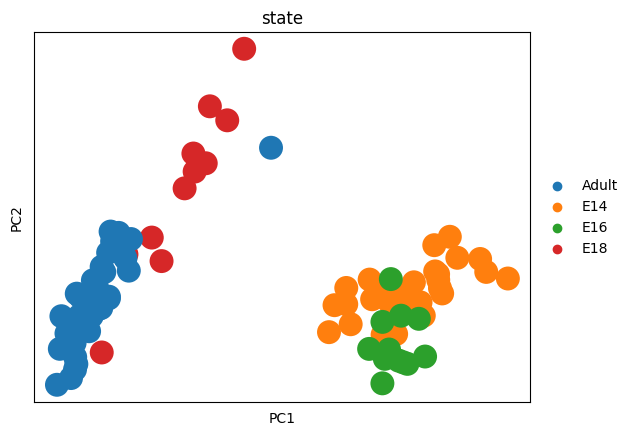

In [9]:
#PCA Dimensionality Reduction
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='state')

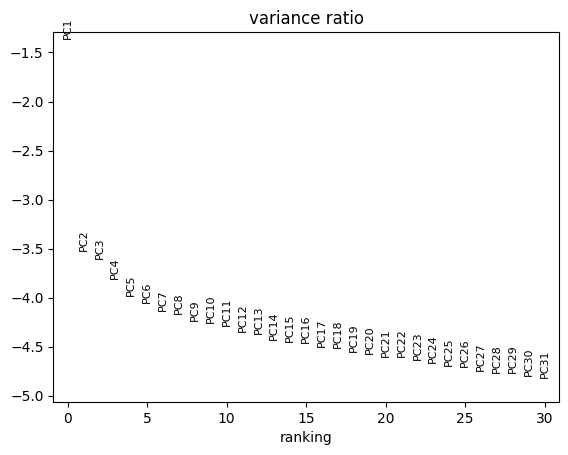

AnnData object with n_obs × n_vars = 101 × 4734
    obs: 'state', 'entropy'
    uns: 'pca', 'state_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [10]:
sc.pl.pca_variance_ratio(adata, log=True)
adata

In [11]:
# Calculate neighborhood graph
sc.pp.neighbors(adata, n_neighbors= 10, n_pcs=50)
adata

AnnData object with n_obs × n_vars = 101 × 4734
    obs: 'state', 'entropy'
    uns: 'pca', 'state_colors', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

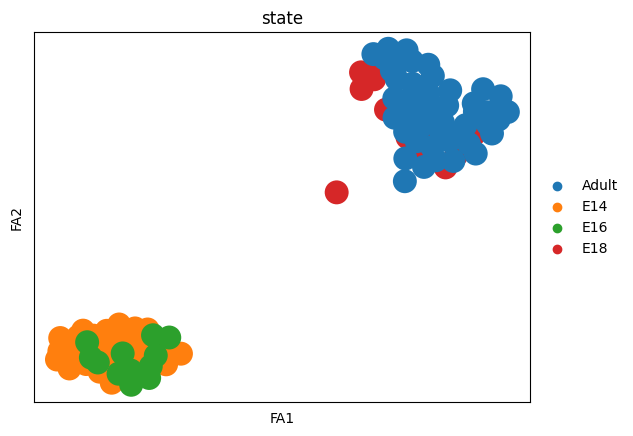

In [12]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='state', legend_loc='right margin')

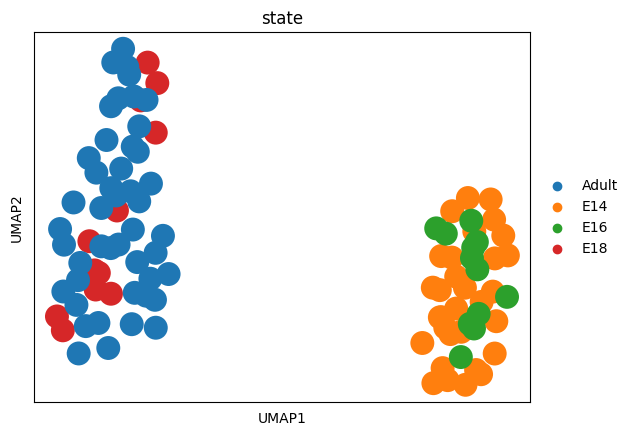

In [13]:
# UMAP dimensionality reduction
sc.tl.umap(adata)
sc.pl.umap(adata, color='state', legend_loc='right margin')

# ADD CCI

In [14]:
cci_df = pd.read_csv('./output/AT2/AT2_cci.csv',index_col = 0)
cci_df

,sender_cells,receiver_cells,ligand,receptor,prob
1,GSM1272036_E16_1_C01_IL4148,GSM1272008_AT2_1_C37_IL3541,Mif,Cd74_Cd44,0.016370
2,GSM1272037_E16_1_C04_IL4148,GSM1272008_AT2_1_C37_IL3541,Mif,Cd74_Cd44,0.016370
3,GSM1272039_E16_1_C06_IL4148,GSM1272008_AT2_1_C37_IL3541,Mif,Cd74_Cd44,0.016370
4,GSM1272040_E16_1_C14_IL4148,GSM1272008_AT2_1_C37_IL3541,Mif,Cd74_Cd44,0.016370
5,GSM1272042_E16_1_C24_IL4148,GSM1272008_AT2_1_C37_IL3541,Mif,Cd74_Cd44,0.016370
...,...,...,...,...,...
2765,GSM1272036_E16_1_C01_IL4148,GSM1271946_E14_1_C02_IL3938,F11r,F11r,0.004243
2766,GSM1272051_E16_1_C67_IL4148,GSM1271946_E14_1_C02_IL3938,F11r,F11r,0.004243
2767,GSM1272059_E16_1_C90_IL4148,GSM1271946_E14_1_C02_IL3938,F11r,F11r,0.004243
2768,GSM1271946_E14_1_C02_IL3938,GSM1271946_E14_1_C02_IL3938,F11r,F11r,0.003606


In [15]:
#best_cci_k
cci_k = 7.5
ti.addCCI(adata, cci_df, cci_k)

Multiplier: 7.5


# PAGA

In [16]:
sc.tl.louvain(adata,use_weights = True, resolution = 1)

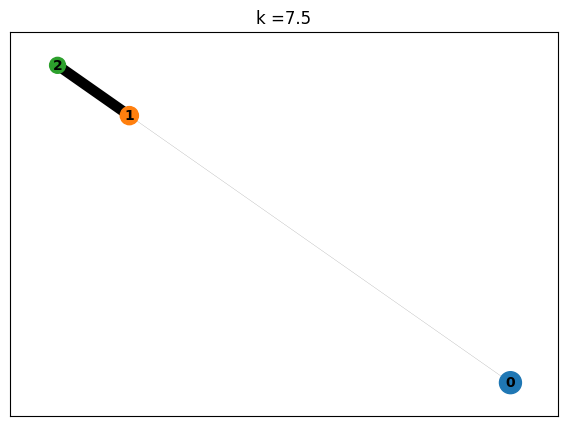

In [17]:
sc.tl.paga(adata, groups='louvain')
paga_filepath = '_AT2_k = '+ str(cci_k)+ '.svg'
sc.pl.paga(adata, color=['louvain'],title = 'k =' + str(cci_k), save = paga_filepath)

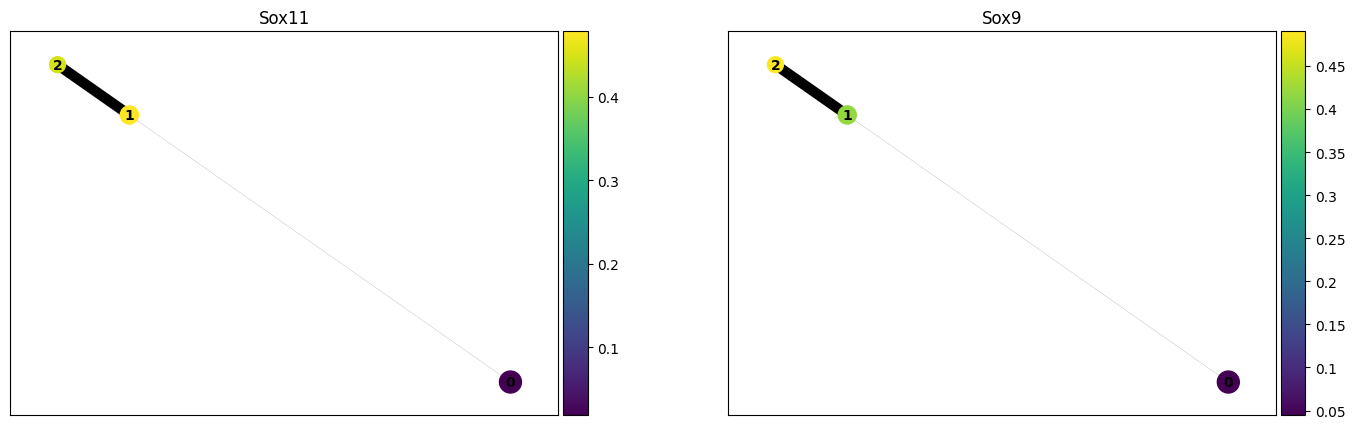

In [18]:
sc.pl.paga(adata, color=['Sox11','Sox9'])

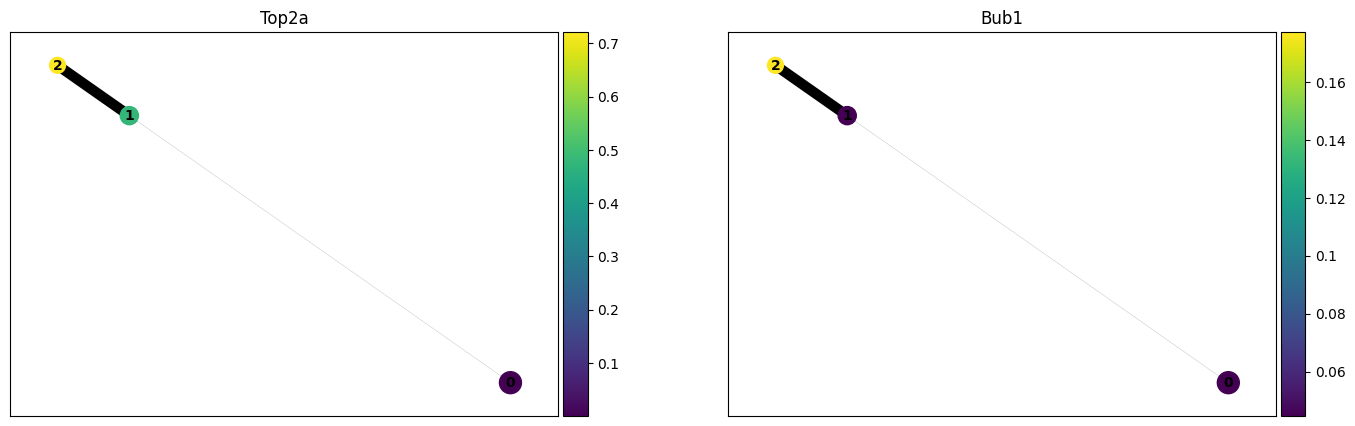

In [19]:
sc.pl.paga(adata, color=['Top2a','Bub1'])

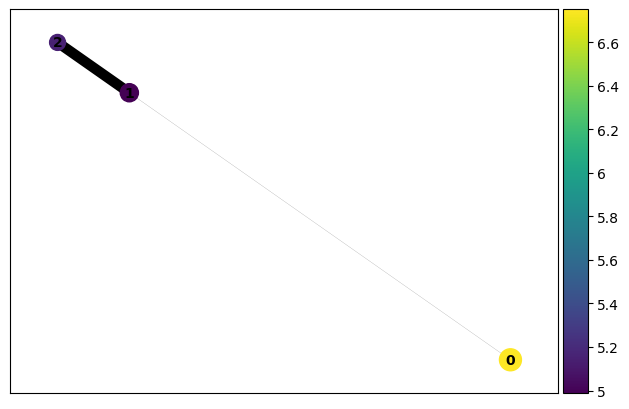

In [20]:
sc.pl.paga(adata, color=['Sftpc'])

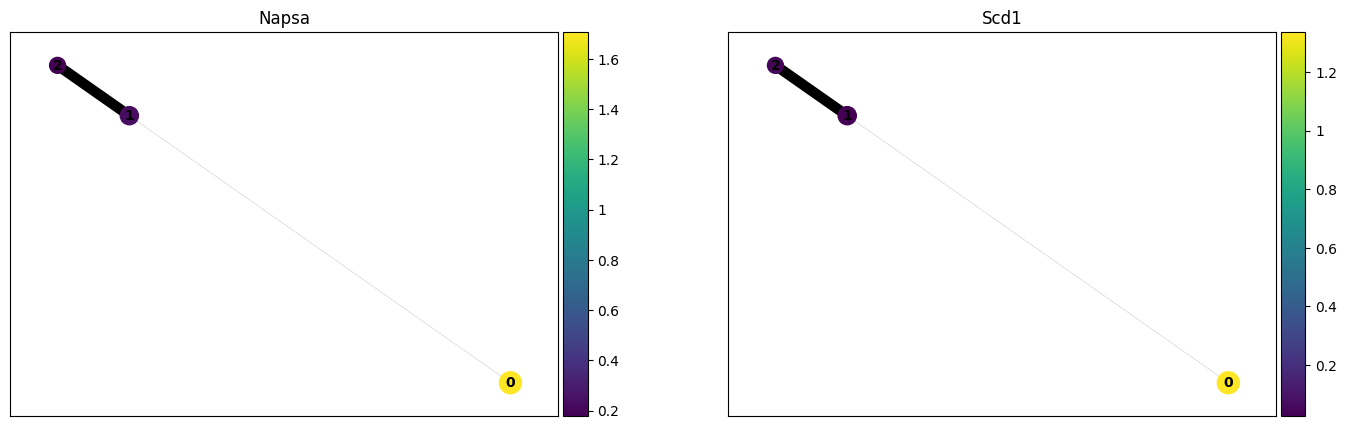

In [21]:
sc.pl.paga(adata, color=['Napsa','Scd1'])

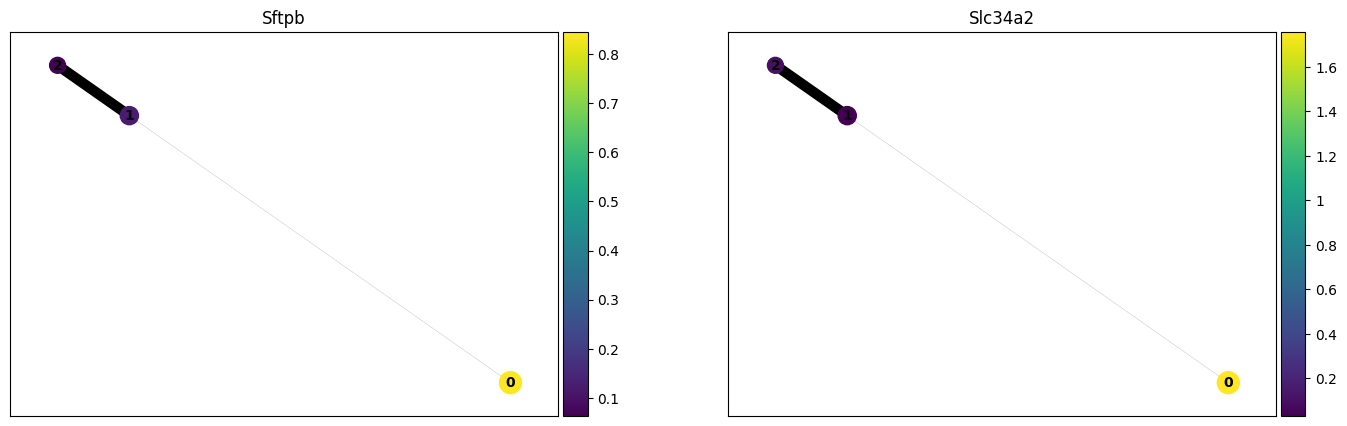

In [22]:
sc.pl.paga(adata, color=['Sftpb','Slc34a2'])

# View Directed Graph

D:\生物信息\240711最终版本代码\Python_tools\ticci.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['stable_entropy'][adata.obs['louvain'] == i] = pagaSCE[i]


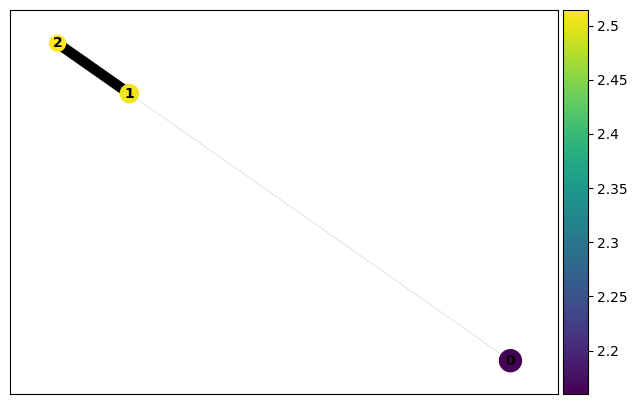

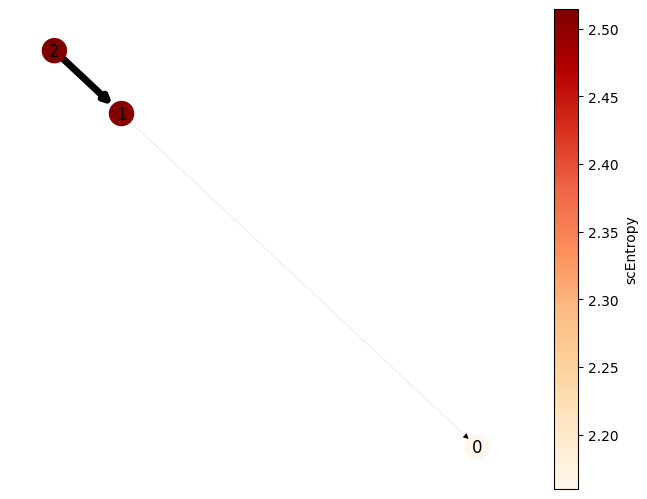

In [23]:
stable_entropy_filepath = '_AT2_k = '+ str(cci_k)+ '_stable_entropy.svg'
lineage_filepath = './figures/AT2/lineage.svg'
ti.getLineage(adata, stable_entropy_filepath, lineage_filepath)

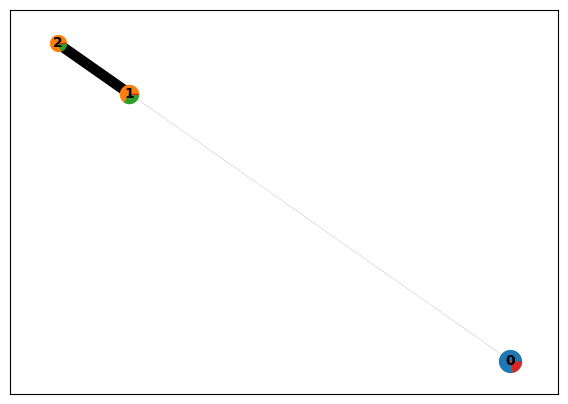

In [24]:
sc.pl.paga(adata, color=['state'])

In [25]:
# Find the Starting Point
max_louvain = np.argmax(adata.uns['louvain_entropy'])
root = np.flatnonzero(adata.to_df().index == (adata.obs['entropy'][adata.obs['louvain']  == str(max_louvain)]).sort_values(ascending = False).index[0])[0]
adata.uns['iroot'] = root 
adata.uns['iroot']

15

In [26]:
# Calculate the Pseudo Time Value
sc.tl.dpt(adata)

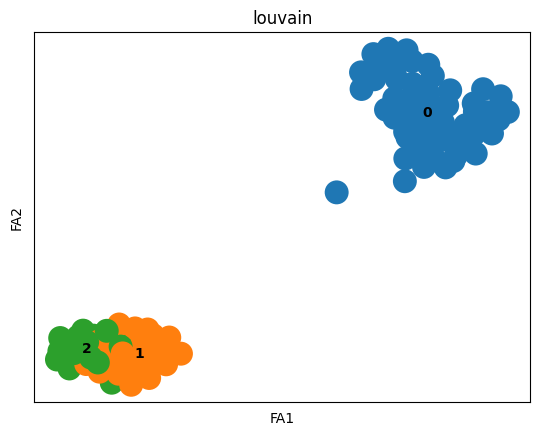

In [27]:
sc.pl.draw_graph(adata, color=['louvain'], legend_loc='on data',save='HSMM_louvain.svg')

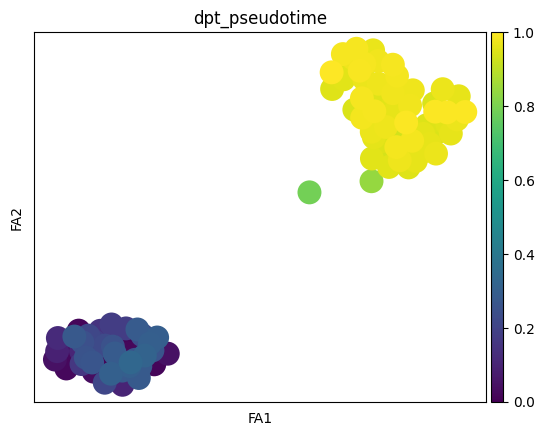

In [28]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], legend_loc='on data',save='HSMM_pseudotime.svg')

# Pseudotime Accuracy Score

In [29]:
# Check Pseudo Time Value
psedotime = adata.obs['dpt_pseudotime']
psedotime.to_frame()

,dpt_pseudotime
GSM1271862_E18_1_C08_IL3230,0.943924
GSM1271864_E18_1_C11_IL3230,0.958138
GSM1271865_E18_1_C13_IL3230,0.921596
GSM1271872_E18_1_C44_IL3230,1.000000
GSM1271873_E18_1_C45_IL3230,0.785345
...,...
GSM1272050_E16_1_C66_IL4148,0.245965
GSM1272051_E16_1_C67_IL4148,0.275429
GSM1272053_E16_1_C72_IL4148,0.277829
GSM1272059_E16_1_C90_IL4148,0.283371


In [30]:
def get_myState(state):
    myState = -1
    if state == 'E14':
        myState = 0
    elif state == 'E16':
        myState = 1
    elif state == 'E18':
        myState = 2
    else:
        myState = 3
    
    return myState

In [34]:
# Determine by States
correct = 0
wrong = 0
undefined = 0
for i in range(0,len(psedotime)):
    for j in range(i+1,len(psedotime)):
#         print(test.index[i],test.index[j])
        i_state = get_myState(adata.obs['state'][i])
        i_dpt_pseudotime = adata.obs['dpt_pseudotime'][i]
        j_state = get_myState(adata.obs['state'][j])
        j_dpt_pseudotime = adata.obs['dpt_pseudotime'][j]

#         print(i_state,i_dpt_pseudotime,j_state,j_dpt_pseudotime)
        if(i_state == j_state):
            undefined += 1
#             print(i_state,i_dpt_pseudotime,j_state,j_dpt_pseudotime,'undefined')
        elif( (i_state > j_state) == (i_dpt_pseudotime > j_dpt_pseudotime) ):
            correct += 1
#             print(i_state,i_dpt_pseudotime,j_state,j_dpt_pseudotime, 'correct')
        else:
            wrong += 1
#             print(i_state,i_dpt_pseudotime,j_state,j_dpt_pseudotime, 'wrong')
        
score = (correct - wrong)/(correct+wrong+undefined)
print(correct,wrong,undefined)
print("score",score)

#max_score
test_max = adata.obs['state']
correct_max = 0
undefined_max = 0
for i in range(0,len(test_max)):
        for j in range(i+1,len(test_max)):
            if test_max[i]==test_max[j]:
                undefined_max += 1
            else:
                correct_max += 1
print(correct_max,undefined_max)
max_score = (correct_max)/(correct_max+undefined_max)
print("max_score",max_score)

pms = score/max_score
print("PMS",pms)

3248 170 1632
score 0.6095049504950495
3418 1632
max_score 0.6768316831683169
PMS 0.9005266237565828


In [31]:
# Save Results
# adata.write('./output/AT2/AT2_finished.h5ad')

# View gene markers for branches

In [32]:
# View gene markers for branches 2→1→0
test = adata.obs['dpt_pseudotime']
test

GSM1271862_E18_1_C08_IL3230    0.943924
GSM1271864_E18_1_C11_IL3230    0.958138
GSM1271865_E18_1_C13_IL3230    0.921596
GSM1271872_E18_1_C44_IL3230    1.000000
GSM1271873_E18_1_C45_IL3230    0.785345
                                 ...   
GSM1272050_E16_1_C66_IL4148    0.245965
GSM1272051_E16_1_C67_IL4148    0.275429
GSM1272053_E16_1_C72_IL4148    0.277829
GSM1272059_E16_1_C90_IL4148    0.283371
GSM1272061_E16_1_C94_IL4148    0.280024
Name: dpt_pseudotime, Length: 101, dtype: float32

In [33]:
order = test.to_frame().sort_values(by=['dpt_pseudotime'],ascending=True)
orderadata = adata.to_df().reindex(order.index)

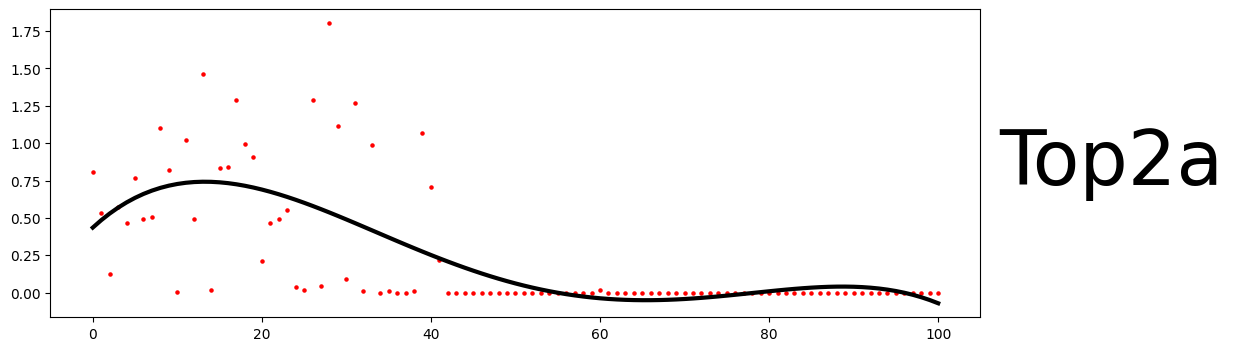

In [34]:
gene = 'Top2a'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()


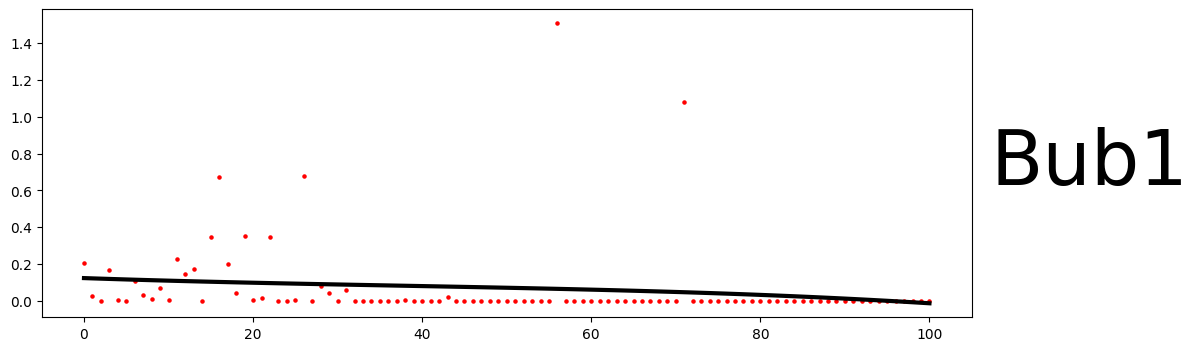

In [35]:
gene = 'Bub1'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

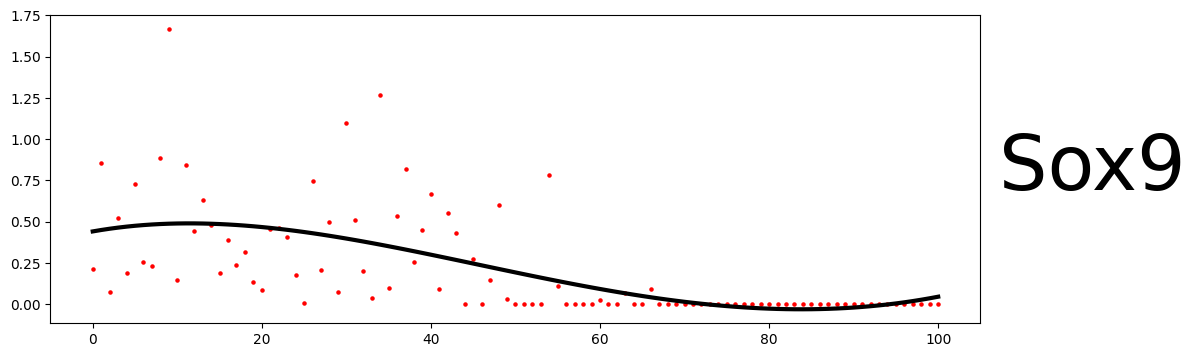

In [36]:
gene = 'Sox9'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

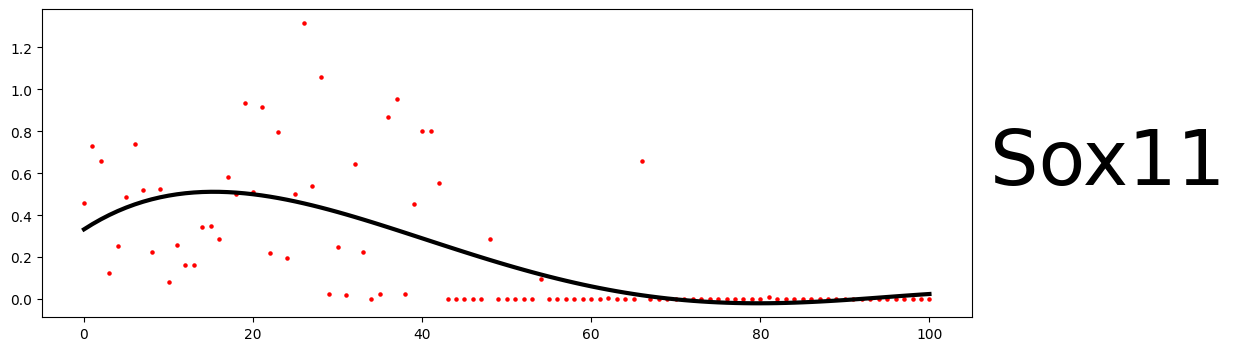

In [37]:
gene = 'Sox11'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

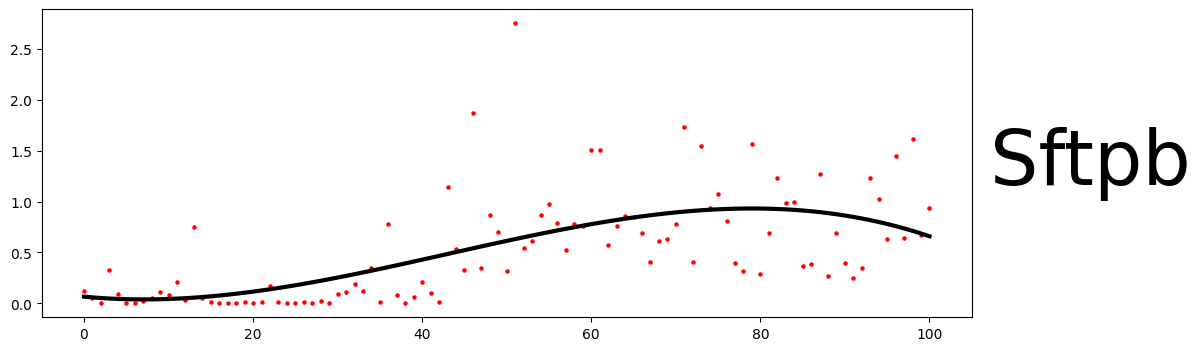

In [38]:
gene = 'Sftpb'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

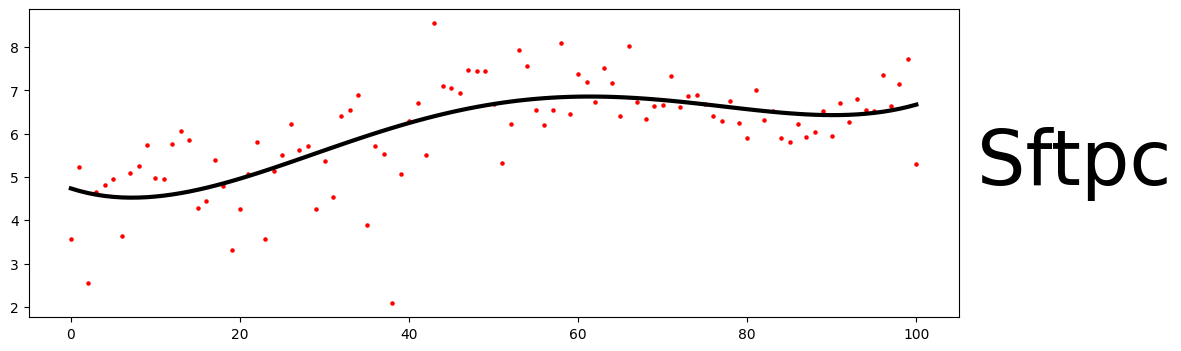

In [39]:
gene = 'Sftpc'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

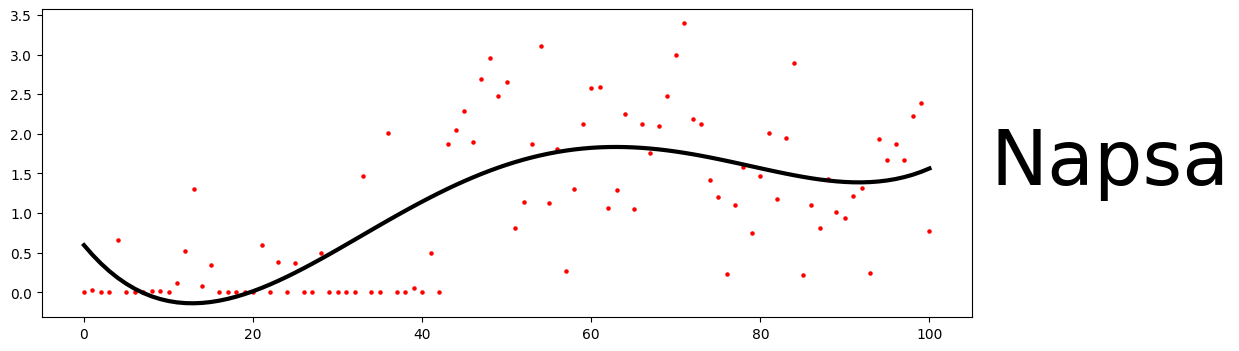

In [48]:
gene = 'Napsa'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

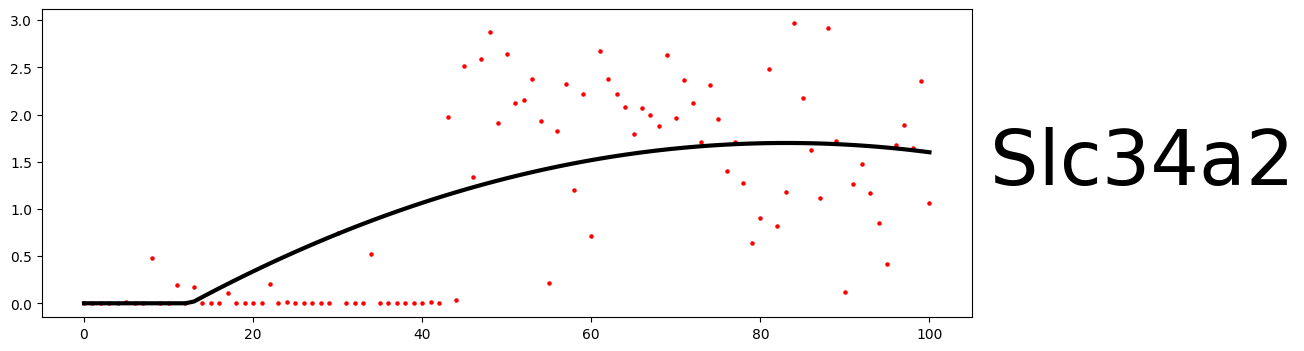

In [49]:
gene = 'Slc34a2'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

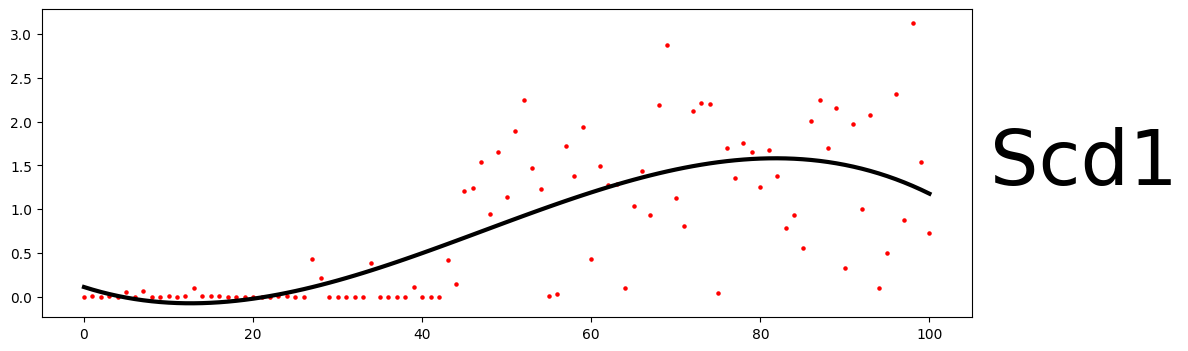

In [42]:
gene = 'Scd1'

x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth='3')

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/AT2/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()